# THS Assignment write By Mohammad Reza Nilchiyan

in the Machine Learning topic, l want you to create a model that is able to predict the NO2 (nitrogen dioxide) levels at any given date, time, and station using the dataset attached in the assignment. The model does not need to be the best possible model, it only needs to do the task reasonably well. We would like you to explain every decision you make so that we have a better picture of your approach.

Since we are also testing your engineering skills, we want production code deployed with docker. We are expecting a stand-alone solution that we can configure to intake a csv file in the same format as the train.csv file and produce an output file with the NO2 predictions. You will be evaluated using the average of the squared difference between your prediction and the real value.

metric  = (1/N) ( SUM( (PRED - REAL)² ) )


## Requirements

We expect to receive back for review:

 1. the code for your solution
 2. a script to create the docker image
 3. a docker compose configuration that includes enviromental variables to define an input file and an output file.
 4. the solution needs to be plug and play, no need for us to install extra dependencies, we only want to run the docker-compose and get a result of the predictions. 

     * For us to test your model, we will use an input file that has the same format of the data you are receiving, where we will look for the prediction at any moment in time of NO2 values.
     * The output file is a csv file with the predictions with the same order as the input.
     


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as skms
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor



In [24]:
df = pd.read_csv('train/train.csv')
df

,Unnamed: 0,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
1,2,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
2,3,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
3,4,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
4,6,2013,3,1,6,3.0,3.0,18.0,32.0,500.0,50.0,-2.6,1026.5,-19.1,0.0,NNE,2.5,Aotizhongxin
5,9,2013,3,1,9,3.0,8.0,12.0,28.0,400.0,59.0,1.2,1028.5,-19.3,0.0,N,2.6,Aotizhongxin
6,10,2013,3,1,10,3.0,6.0,9.0,12.0,400.0,72.0,1.9,1028.2,-19.4,0.0,NNW,3.6,Aotizhongxin
7,11,2013,3,1,11,3.0,6.0,9.0,14.0,400.0,71.0,2.9,1028.2,-20.5,0.0,N,3.7,Aotizhongxin
8,12,2013,3,1,12,3.0,6.0,7.0,13.0,300.0,74.0,3.9,1027.3,-19.7,0.0,NNW,5.1,Aotizhongxin
9,13,2013,3,1,13,3.0,6.0,7.0,12.0,400.0,76.0,5.3,1026.2,-19.3,0.0,NW,4.3,Aotizhongxin


Fisrt we need to have better idea of different parameters that we have in this study. There can be some nan entries. nan happens when there is some issues in some calculations, therefore this is not a valid values to be considered. Therefore we drop the rows that has nan values.

In [25]:
# drop any rows with at least one nan
df = df.dropna()



We plot different columns to see how their values vary to have some ideas of these data

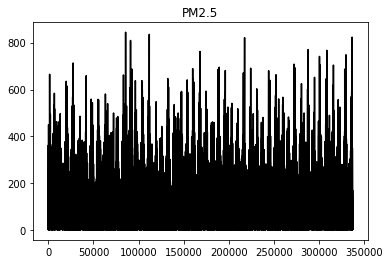

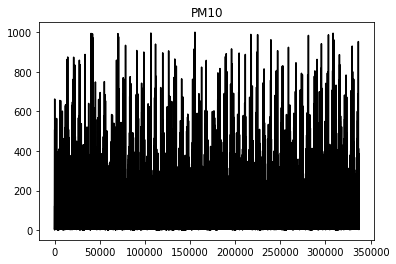

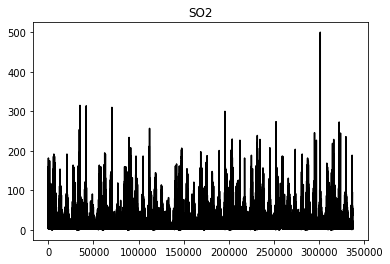

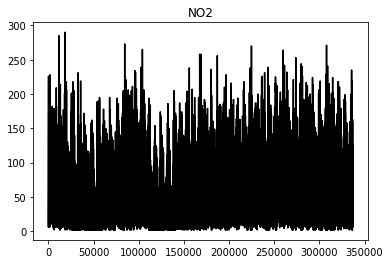

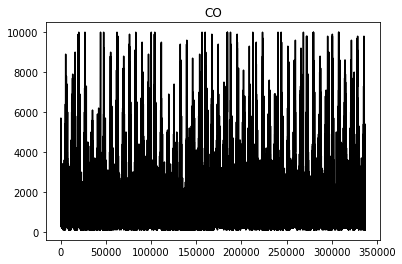

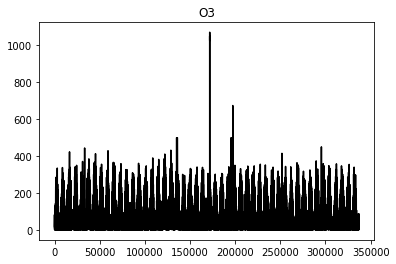

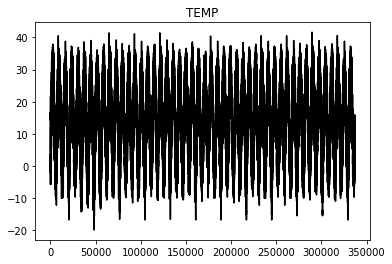

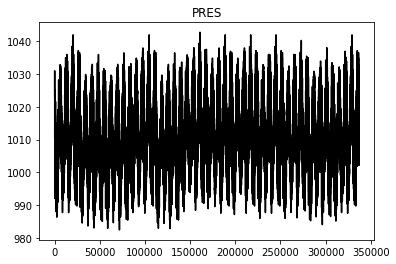

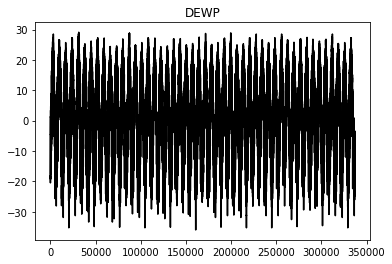

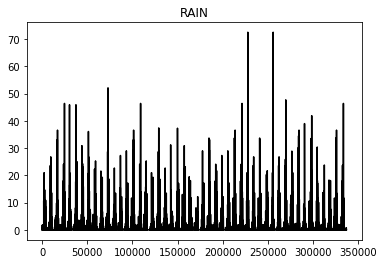

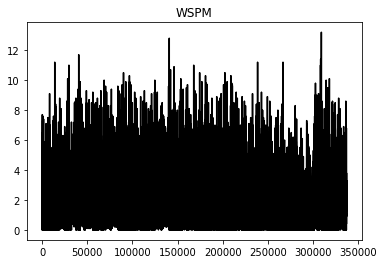

In [26]:
# plot different columns to have some ideas of how they vary
for col in df.columns:
    # check if it is a numeric columns
    if all([isinstance(elem, float) for elem in df[col]]):
        plt.figure()
        plt.plot(df[col], color='k')
        plt.title(col)


We also plot their histogram to know their distributions

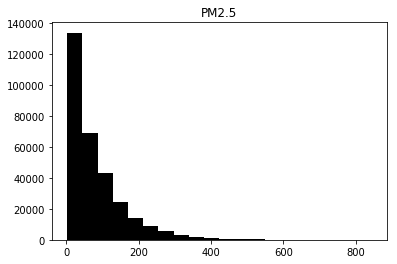

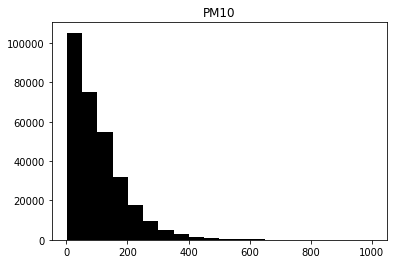

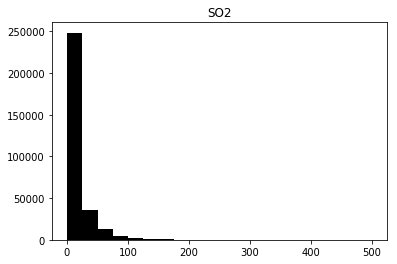

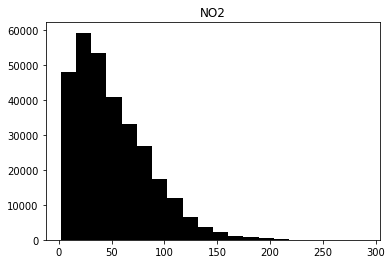

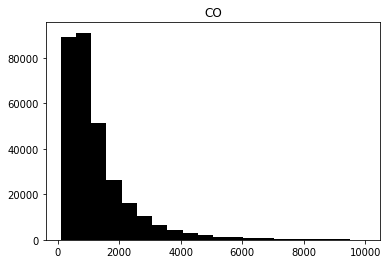

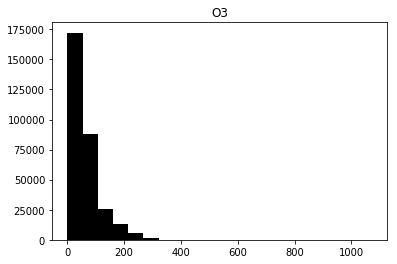

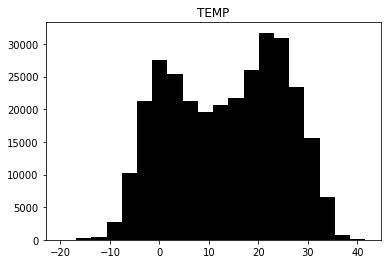

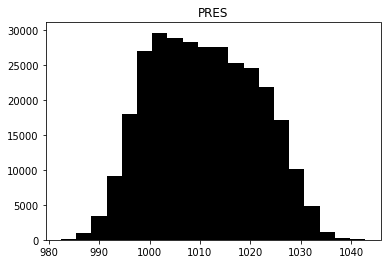

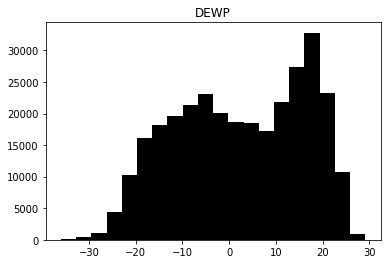

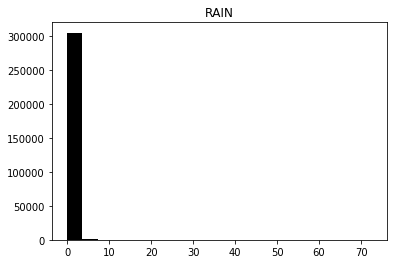

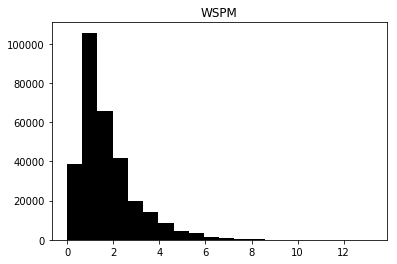

In [27]:
# plot histogram of each columns to have some ideas of what are their distributions
for col in df.columns:
    # check if it is a numeric columns
    if all([isinstance(elem, float) for elem in df[col]]):
        plt.figure()
        n, bins, patches = plt.hist(x=df[col], bins=20, color='k')
        plt.title(col)

Since the goal is to estimate NO" value based on the other parameters, we compute the correlations between NO" values and the others

In [28]:
# compuet correlation of each column with the No2 column, 
# to have some rough ideas which ones are more correlated 
# to the NO2 column

correlation_dict = {}
for col in df.columns:
    # check if it is a numeric columns
    if all([isinstance(elem, float) for elem in df[col]]):
        correlation_dict.update({col :
                                    df['NO2'].corr(df[col])})
# conver the dictionary to dataframe
correlation_df = pd.Series(correlation_dict)
print(correlation_df)
        

PM2.5    0.670603
PM10     0.653662
SO2      0.501671
NO2      1.000000
CO       0.705154
O3      -0.476297
TEMP    -0.276479
PRES     0.173141
DEWP    -0.028610
RAIN    -0.043907
WSPM    -0.402511
dtype: float64


On one side, some of the parameters are highly correlated with NO2, on the other some including PRES, RAIN, and DEWP are almost uncorrelated. It is important to see how correlated each pair of columns is.


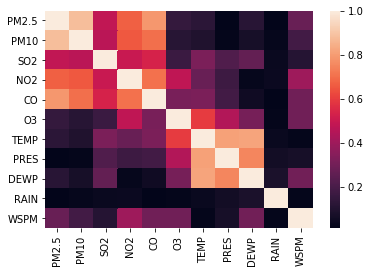

In [29]:
# drop non numeric columns
df_ = df.copy()
for col in df.columns:
    # check if it is not a numeric columns, then drop this column
    if not all([isinstance(elem, float) for elem in df[col]]):
        df_ = df_.drop(columns = [col])

# compute correlation matrix
corr = df_.corr()
#sns.pairplot(df_)
# plot the heatmap
sns.heatmap(corr.abs(), 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

To be sure that some parameters are irrelevant, we compute correlation matrix considering the rows correspond to each category specified by wd column.

In [30]:
# find different types of wd
wd_types = list(set(df['wd']))
print(wd_types)

# compute correlation again, this time for the ones in a specific wd_type

for wd_ in wd_types:
    # select the rows whose wd_type is wd_
    df_aux = df_.loc[df['wd'] == wd_]
    print('--------------------------------------')
    print('-----   wd :', wd_)
    print('number of elements : ', df_aux.shape[0])
    print(df_aux.corr())
    print('--------------------------------------')

['ENE', 'SSW', 'S', 'W', 'WNW', 'NE', 'SE', 'SSE', 'NNE', 'SW', 'NW', 'N', 'ESE', 'WSW', 'E', 'NNW']
--------------------------------------
-----   wd : ENE
number of elements :  24971
          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.940843  0.473645  0.711633  0.807241 -0.257036 -0.260094   
PM10   0.940843  1.000000  0.481058  0.746178  0.774779 -0.265713 -0.236313   
SO2    0.473645  0.481058  1.000000  0.496266  0.541482 -0.229393 -0.416353   
NO2    0.711633  0.746178  0.496266  1.000000  0.699836 -0.534855 -0.338949   
CO     0.807241  0.774779  0.541482  0.699836  1.000000 -0.369501 -0.447421   
O3    -0.257036 -0.265713 -0.229393 -0.534855 -0.369501  1.000000  0.524455   
TEMP  -0.260094 -0.236313 -0.416353 -0.338949 -0.447421  0.524455  1.000000   
PRES   0.106795  0.074691  0.263122  0.193792  0.272080 -0.406199 -0.810694   
DEWP  -0.031522 -0.041885 -0.384316 -0.124999 -0.212011  0.270567  0.853158   
RAIN  -0.045007 -0.053796

--------------------------------------
-----   wd : SSE
number of elements :  12822
          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.859279  0.399609  0.577535  0.734314 -0.097664 -0.172512   
PM10   0.859279  1.000000  0.421092  0.586670  0.656958 -0.074416 -0.145498   
SO2    0.399609  0.421092  1.000000  0.472879  0.488040 -0.199842 -0.404508   
NO2    0.577535  0.586670  0.472879  1.000000  0.647468 -0.529607 -0.479358   
CO     0.734314  0.656958  0.488040  0.647468  1.000000 -0.305966 -0.399060   
O3    -0.097664 -0.074416 -0.199842 -0.529607 -0.305966  1.000000  0.730242   
TEMP  -0.172512 -0.145498 -0.404508 -0.479358 -0.399060  0.730242  1.000000   
PRES   0.083545  0.051293  0.315910  0.393516  0.289582 -0.599709 -0.807516   
DEWP   0.037209 -0.025347 -0.413896 -0.304223 -0.174415  0.486323  0.823383   
RAIN  -0.001351 -0.017452 -0.028980 -0.040169 -0.010179 -0.005712  0.004923   
WSPM  -0.117309 -0.038517 -0.048343 -0.340632 -

          PM2.5      PM10       SO2       NO2        CO        O3      TEMP  \
PM2.5  1.000000  0.902792  0.405246  0.632764  0.762333 -0.152126 -0.211376   
PM10   0.902792  1.000000  0.428963  0.663923  0.705799 -0.133104 -0.189451   
SO2    0.405246  0.428963  1.000000  0.456123  0.451022 -0.142786 -0.369417   
NO2    0.632764  0.663923  0.456123  1.000000  0.678405 -0.508403 -0.440925   
CO     0.762333  0.705799  0.451022  0.678405  1.000000 -0.320756 -0.411698   
O3    -0.152126 -0.133104 -0.142786 -0.508403 -0.320756  1.000000  0.647265   
TEMP  -0.211376 -0.189451 -0.369417 -0.440925 -0.411698  0.647265  1.000000   
PRES   0.093314  0.059967  0.258149  0.330720  0.296183 -0.523229 -0.798337   
DEWP  -0.007910 -0.049097 -0.409187 -0.266161 -0.198036  0.396067  0.837621   
RAIN  -0.044154 -0.056484 -0.059108 -0.071703 -0.024836  0.020228  0.025681   
WSPM  -0.099648 -0.060976  0.025747 -0.276806 -0.126497  0.338254  0.203664   

           PRES      DEWP      RAIN      WSPM  
PM2

These correlation matrices suggest that the parameters that in general looked irrelevant, can have some information of NO" parameter for some categories grouped by wd column values

In [31]:
# different station
print(set(df['station']))

{'Changping', 'Huairou', 'Wanshouxigong', 'Wanliu', 'Dingling', 'Shunyi', 'Aotizhongxin', 'Dongsi', 'Nongzhanguan', 'Gucheng', 'Tiantan', 'Guanyuan'}


# Linear Regression (without considering non-numeric columns)

In [32]:
# Linear Model
X = df_[[col for col in df_.columns if col!='NO2']]
y = df_['NO2']

X_train, X_test, y_train, y_test = skms.train_test_split(X, y, test_size=0.3, random_state=101)


In [33]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
predictions = lm.predict(X_test)
print(mean_squared_error(y_test, predictions))

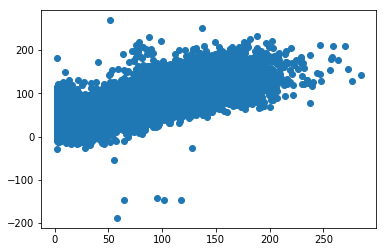

In [35]:
plt.scatter(y_test,predictions)


# MLP Regression (without considering non numeric columns)

303.11543416012046


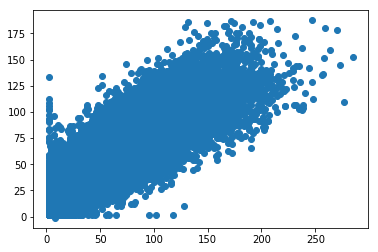

In [41]:
mlp = MLPRegressor(random_state=0, activation='relu', hidden_layer_sizes=(6,3,3))


mlp.fit(X_train, y_train)

predictions = mlp.predict(X_test)
plt.scatter(y_test,predictions)

print(mean_squared_error(y_test, predictions))



(array([4.0000e+00, 2.0000e+01, 3.2200e+02, 1.4610e+04, 6.3101e+04,
        1.2220e+04, 1.3160e+03, 1.8000e+02, 3.2000e+01, 1.0000e+00]),
 array([-131.44070771, -101.51326047,  -71.58581323,  -41.658366  ,
         -11.73091876,   18.19652848,   48.12397572,   78.05142296,
         107.9788702 ,  137.90631743,  167.83376467]),
 <a list of 10 Patch objects>)

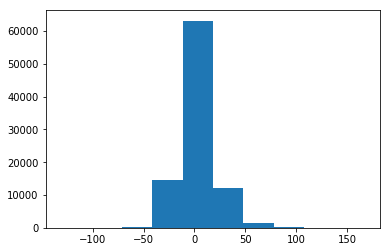

In [42]:
plt.hist((y_test-predictions))